# Seattle Airbnb Data Analysis



For the Airbnb dataset we have in the bellow some points that tell us about the dataset:

- Scores of reviews and the describtion
- We have for each reviewer an ID and some comments
- Array of ID plus the price

In [1]:
# import desired librarities
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

warnings.filterwarnings('ignore')
%matplotlib inline

# Overview

In [2]:
# change the points to 
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_columns', 90)

In [3]:
#read listing data and put it in ds
ds = pd.read_csv("listings.csv")
ds.shape
ds.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,...,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,...,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,...,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spect

In [4]:
ds.shape

(3818, 92)

In [5]:
# let's see the price missing
ds["price"].isnull().mean()

0.0

In [6]:
# show the colmuns 
ds.columns.values

array(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'thumbnail_url',
       'medium_url', 'picture_url', 'xl_picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode',
       'market', 'smart_location', 'country_code', 'country', 'latitude',
       'longitude', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       

In [7]:
#show the missing with more than 0.6
Data_col = ds.columns[ds.isnull().mean() > 0.6]
Data_col

Index(['square_feet', 'monthly_price', 'license'], dtype='object')

In [8]:
ds[['square_feet', 'monthly_price' ,'license']].isnull().mean()

square_feet      0.974594
monthly_price    0.602672
license          1.000000
dtype: float64

In [9]:
# And now let's see the percentage for all features
ds.isnull().mean().sort_values(ascending=False)

license                             1.000000
square_feet                         0.974594
monthly_price                       0.602672
security_deposit                    0.511262
weekly_price                        0.473808
notes                               0.420639
neighborhood_overview               0.270299
cleaning_fee                        0.269775
transit                             0.244631
host_about                          0.224987
host_acceptance_rate                0.202462
review_scores_accuracy              0.172342
review_scores_checkin               0.172342
review_scores_value                 0.171818
review_scores_location              0.171556
review_scores_cleanliness           0.171032
review_scores_communication         0.170508
review_scores_rating                0.169460
last_review                         0.164222
first_review                        0.164222
reviews_per_month                   0.164222
space                               0.149031
host_respo

In [10]:
ds["neighbourhood_group_cleansed"].isnull().mean()

0.0



Since we have cleaned neighborhood we will drop many columns

In [11]:
ds["experiences_offered"].unique()

array(['none'], dtype=object)


We are going to drop some colmuns because we are not interested in its data

In [12]:
# Now let's remove the following feature since it's not important to our analysis
ds.drop(["square_feet", "license", "neighbourhood", "listing_url", "scrape_id"
                 ,"last_scraped", "host_id", "host_url", "host_name", "host_since"
                 ,"host_location", "host_about", "host_thumbnail_url"
                 ,"host_picture_url"
                 ,"host_neighbourhood", "name", "summary", "space"
                 , "experiences_offered"
                 ,"thumbnail_url", "neighborhood_overview", "notes", "transit"
                 , "medium_url"
                 ,"picture_url", "xl_picture_url", "host_verifications", "street"
                 ,"state", "zipcode", "market", "smart_location", "country_code"
                 ,"country", "latitude", "longitude", "amenities", "security_deposit"
                 ,"cleaning_fee", "extra_people", "weekly_price", "monthly_price"
                 , "calendar_updated"
                 ,"has_availability", "calendar_last_scraped", "first_review"
                 , "last_review"
                 ,"requires_license", "jurisdiction_names", "description", "city"
                 , "host_has_profile_pic"
                 ,"require_guest_profile_picture", "require_guest_phone_verification"
                 ,"host_acceptance_rate"], axis=1, inplace=True)
ds.shape

(3818, 37)

In [13]:
#sort values
pd.concat([ds.isnull().mean().sort_values(ascending=False), ds.dtypes], axis=1).sort_values(by=0, ascending=False)

,0,1
review_scores_accuracy,0.172342,float64
review_scores_checkin,0.172342,float64
review_scores_value,0.171818,float64
review_scores_location,0.171556,float64
review_scores_cleanliness,0.171032,float64
review_scores_communication,0.170508,float64
review_scores_rating,0.169460,float64
reviews_per_month,0.164222,float64
host_response_time,0.136983,object
host_response_rate,0.136983,object


In [14]:
# change the price to be float
ds["price"] = ds["price"].replace('[\$,]', '', regex=True).astype(float)

In [15]:
# let's see if there is a NaN value
ds[["room_type", "property_type"]][ds["property_type"].isnull()]

,room_type,property_type
2184,Entire home/apt,NaN


In [16]:
# let's see the mode 
ds["property_type"][ds["room_type"]=="Entire home/apt"].mode()

0    Apartment
dtype: object

In [17]:
# let's change it to the mode value
ds["property_type"][ds["property_type"].isnull()] = "Apartment"

In [18]:
ds[ds["beds"].isnull()]

,id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_identity_verified,neighbourhood_cleansed,neighbourhood_group_cleansed,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,price,guests_included,minimum_nights,maximum_nights,availability_30,availability_60,availability_90,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,calculated_host_listings_count,reviews_per_month
1961,609252,within an hour,100%,f,2.0,2.0,t,Greenwood,Other neighborhoods,t,House,Private room,4,NaN,1.0,NaN,Real Bed,280.0,1,1,1125,30,60,90,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,flexible,2,NaN


In [19]:
#changing host response datatype 
ds["host_response_rate"] = ds["host_response_rate"].str.rstrip("%").astype("float") / 100.0

In [20]:
# let's show the string columns
ds.select_dtypes(include=['O']).columns

Index(['host_response_time', 'host_is_superhost', 'host_identity_verified',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
       'is_location_exact', 'property_type', 'room_type', 'bed_type',
       'instant_bookable', 'cancellation_policy'],
      dtype='object')

In [21]:
ds.shape

(3818, 37)

In [22]:
# find what will the data be after dropping if you drop all the nan 

ds.dropna(axis=0).shape

(2834, 37)

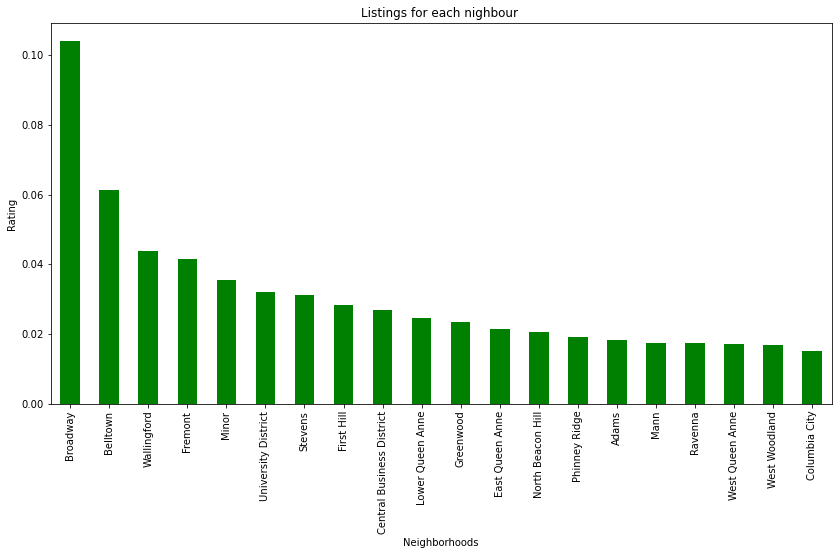

In [23]:
top_neigh = ds["neighbourhood_cleansed"].value_counts()/ds["neighbourhood_cleansed"].value_counts().sum()

top_neigh[:20].plot(kind="bar", legend=None, figsize=(14,7), color = 'green');
plt.title("Listings for each nighbour ");
plt.xlabel("Neighborhoods");
plt.ylabel("Rating");

In [24]:
# What percentage have we get by taking the top 25 neighborhoods?
top_neigh[:25].sum()

0.685175484546883

In [25]:
#calculating the user rating
rating_nb = ds[["neighbourhood_cleansed", "review_scores_location"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="review_scores_location", ascending=False)

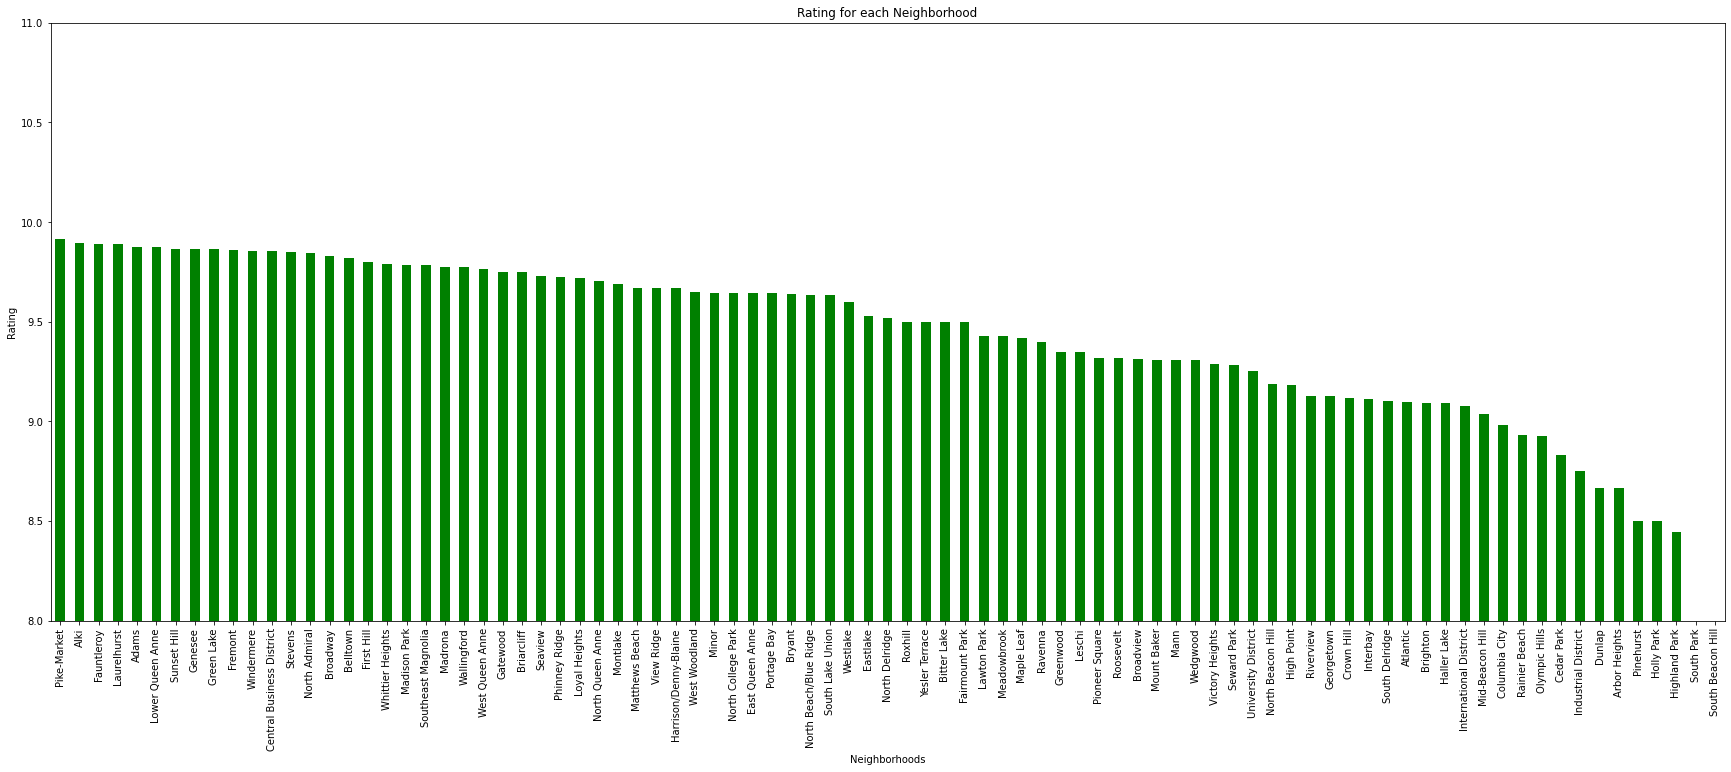

In [26]:
# Showing the rating for each neighborhood
rating_nb.plot(kind="bar", legend=None, figsize=(30,11), color = 'green');
plt.title("Rating for each Neighborhood");
plt.ylim(8, 11);
plt.xlabel("Neighborhoods");
plt.ylabel("Rating");

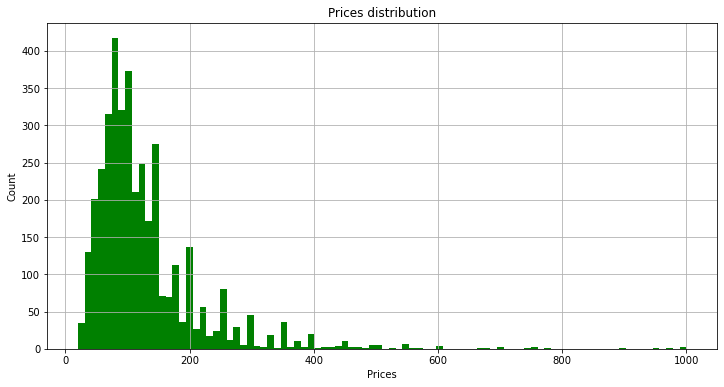

In [27]:
# Showing the prices ditribution
plt.figure(figsize=(12, 6));
ds["price"].hist(bins=90, color = 'green');
plt.title("Prices distribution");
plt.xlabel("Prices");
plt.ylabel("Count");

# Question 1

- Find what are the highest and lowest neighborhood based on the cost ?
- Find what is the variation between the price and the average price?

In [28]:
# mean for each neighbourhood
#price_nb = ds[["neighbourhood_cleansed", "price"]].\
   # groupby(["neighbourhood_cleansed"]).mean().\
  # sort_values(by="price", ascending=False)[:20].plot(kind='bar',color = 'green')
#plt.title("Prices for each Neighborhood");
#plt.xlabel("Neighborhood");
#plt.ylabel("Average Prices");

In [29]:
price_nb = ds[["neighbourhood_cleansed", "price"]].\
    groupby(["neighbourhood_cleansed"]).mean().\
    sort_values(by="price", ascending=False)


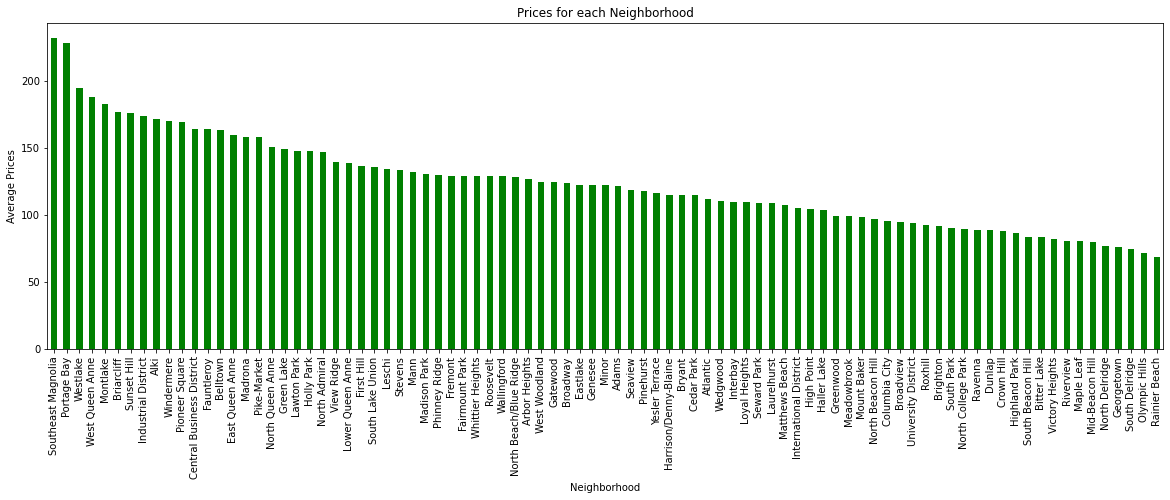

In [30]:
# show the mean
price_nb.plot(kind="bar", legend=None, figsize=(20,6), color = 'green');
plt.title("Prices for each Neighborhood");
plt.xlabel("Neighborhood");
plt.ylabel("Average Prices");

In [31]:
#mean and showing it with the difference percentage
price_nb["%diff from Overall Avg Price"] = (price_nb["price"]-ds["price"].mean()) / ds["price"].mean()
price_nb

,price,%diff from Overall Avg Price
neighbourhood_cleansed,,
Southeast Magnolia,231.705882,0.810539
Portage Bay,227.857143,0.780465
Westlake,194.470588,0.519584
West Queen Anne,187.769231,0.467220
Montlake,182.789474,0.428309
Briarcliff,176.571429,0.379721
Sunset Hill,176.055556,0.375690
Industrial District,173.333333,0.354419
Alki,171.619048,0.341024


In [32]:
# Highest 10 and lowest neighborhood
pp = pd.concat([price_nb[:10], price_nb[-10:]], axis=0).reset_index()
pp.columns = ["Neighbourhood", "Avg Price", "Percintage from Avg"]

arr = ["Top " + str(s) for s in list(range(1, 11, 1))] + list("Bottom " + str(s) for s in list(range(10, 0, -1)))
pp["Rank"] = arr
pp = pp[["Rank", "Neighbourhood", "Avg Price", "Percintage from Avg"]]
pp.style.bar(subset=['Percintage from Avg'], align='mid', color=['#d65f5f', '#5fba7d'])

,Rank,Neighbourhood,Avg Price,Percintage from Avg
0,Top 1,Southeast Magnolia,231.705882,0.810539
1,Top 2,Portage Bay,227.857143,0.780465
2,Top 3,Westlake,194.470588,0.519584
3,Top 4,West Queen Anne,187.769231,0.467220
4,Top 5,Montlake,182.789474,0.428309
5,Top 6,Briarcliff,176.571429,0.379721
6,Top 7,Sunset Hill,176.055556,0.375690
7,Top 8,Industrial District,173.333333,0.354419
8,Top 9,Alki,171.619048,0.341024
9,Top 10,Windermere,169.900000,0.327591


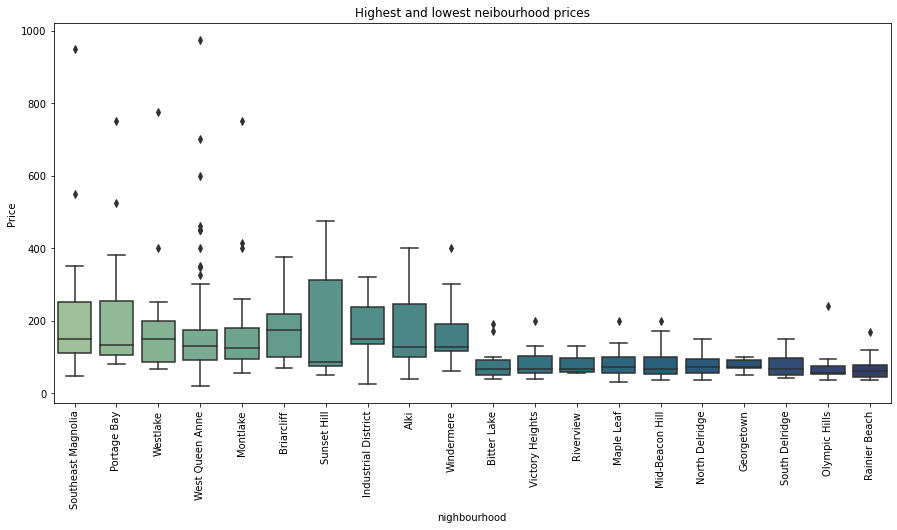

In [33]:
#Using the box plot
top_bottom = list(price_nb.index[:10]) + list(price_nb.index[-10:])
top_bottom_plt = ds[["neighbourhood_cleansed", "price"]][ds["neighbourhood_cleansed"].isin(top_bottom)]

plt.figure(figsize=(15, 7));
sns.boxplot(x="neighbourhood_cleansed", y="price", data=top_bottom_plt, order=pp["Neighbourhood"],palette = 'crest');
plt.xticks(rotation=90);
plt.title("Highest and lowest neibourhood prices");
plt.xlabel("nighbourhood");
plt.ylabel("Price");

# Question 2

What types of properties are mostly available in Seattle and how does the price vary by property type?

- Find what are the properties that are available ?
- Looking at the property, How could the prices changed ? 

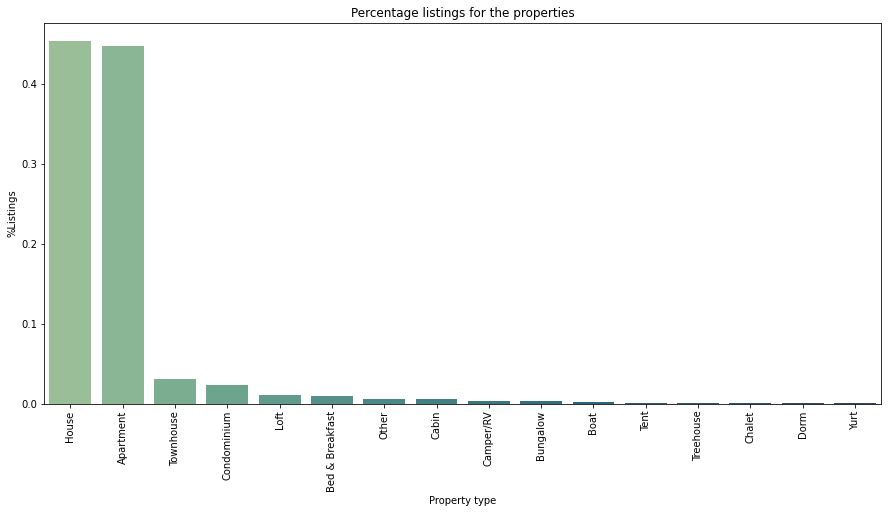

In [34]:
# Creating the array 
array_property = ds["property_type"].value_counts()/ds["property_type"].value_counts().sum()
array_property = array_property.reset_index()
array_property.columns = ["property_type", "%Listings"]

# show it
plt.figure(figsize=(15, 7));
sns.barplot(x="property_type", y="%Listings", data=array_property, palette = 'crest');
plt.xticks(rotation=90);
plt.title("Percentage listings for the properties");
plt.xlabel("Property type");

In [35]:
array_property["%Listings"][:3].sum()

0.9324253535882661

In [36]:
# find for each property the number of the listing
ds["property_type"].value_counts()

House              1733
Apartment          1709
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Camper/RV            13
Bungalow             13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: property_type, dtype: int64

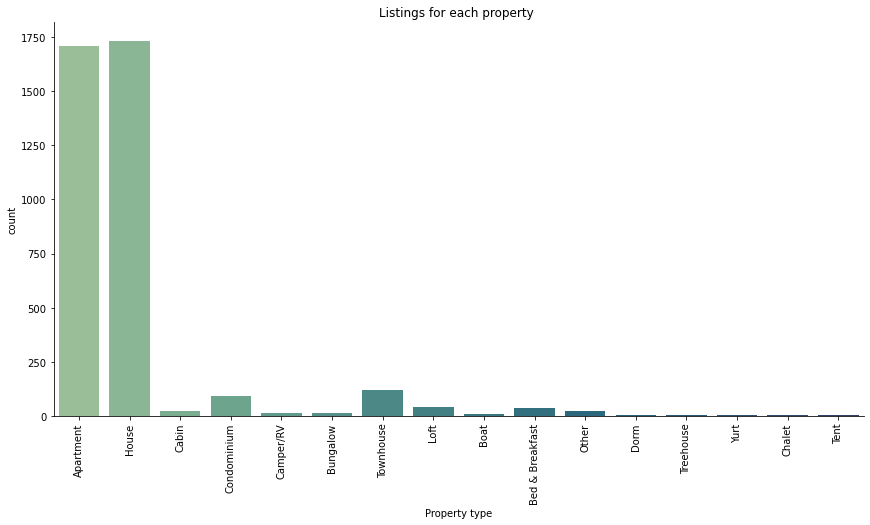

In [37]:
#show it
sns.factorplot("property_type", data=ds, kind='count', size=6, aspect=2,palette = 'crest');
plt.xticks(rotation=90);
plt.title("Listings for each property ");
plt.xlabel("Property type");

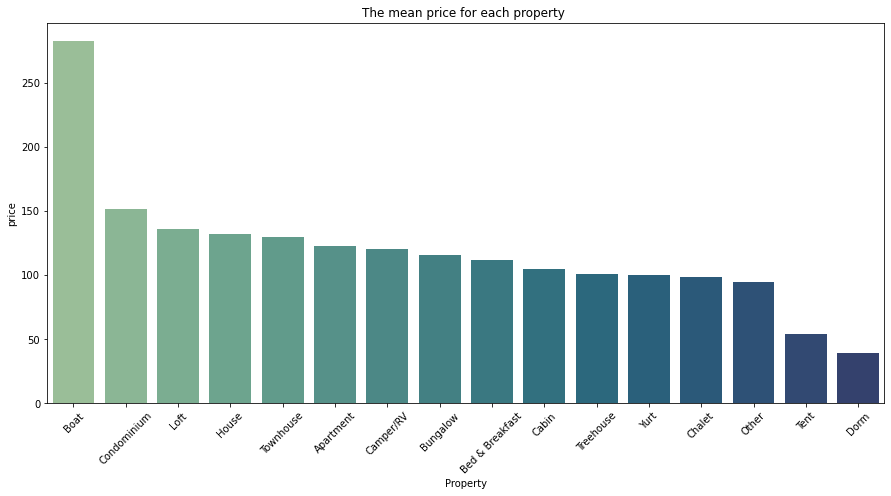

In [38]:
price_pp = ds[["property_type", "price"]].\
    groupby(["property_type"]).mean().\
    sort_values(by="price", ascending=False).\
    reset_index()
    
plt.figure(figsize=(15, 7));
sns.barplot(x="property_type", y="price", data=price_pp, palette = 'crest');
plt.xticks(rotation=45);
plt.title("The mean price for each property ");
plt.xlabel("Property");

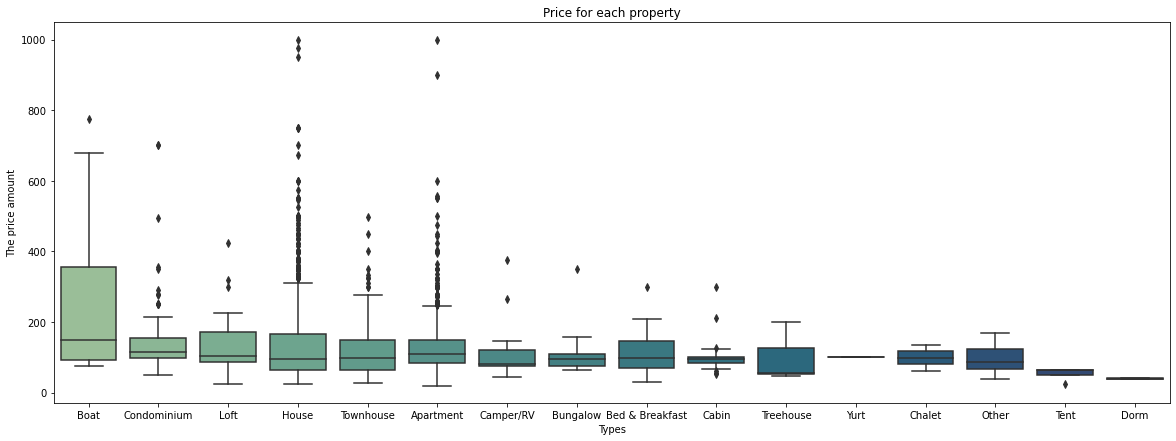

In [39]:
# Using the box plot
prop_type_plt = ds[["property_type", "price"]]

plt.figure(figsize=(20, 7));
sns.boxplot(x="property_type", y="price", data=prop_type_plt, order=price_pp["property_type"],palette = 'crest');
plt.xticks(rotation=0);
plt.title("Price for each property");
plt.xlabel("Types");
plt.ylabel("The price amount");

# Question 3 - Regression and coefficients approach



 What is the most effective  feature on the price?



What we are going to do:
- Make the dummies
- train and fix nan values
- predicttion


### Feature selection

 Relationship of the variables

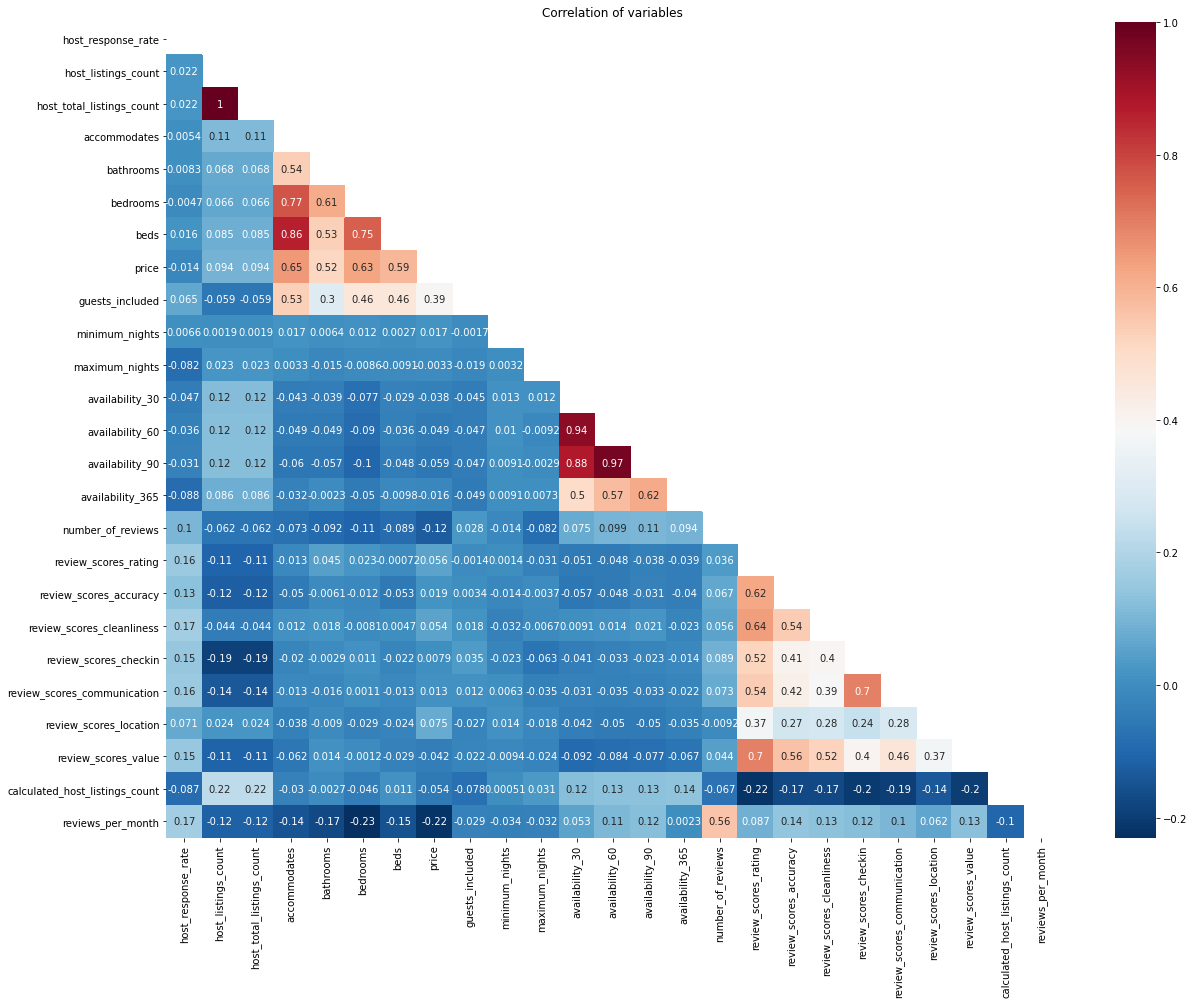

In [40]:
#Using the heat map
Correlation = ds.drop("id", axis=1).corr()
mask = np.zeros_like(Correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(20, 15));
ax = sns.heatmap(Correlation, mask=mask, annot=True, fmt=".2g", cmap = "RdBu_r");
plt.title("Correlation of variables");
ax.set_ylim(25);

In [41]:
Correlation["price"].sort_values(ascending=False)

price                             1.000000
accommodates                      0.652218
bedrooms                          0.627720
beds                              0.589525
bathrooms                         0.516424
guests_included                   0.392875
host_total_listings_count         0.093962
host_listings_count               0.093962
review_scores_location            0.075069
review_scores_rating              0.055551
review_scores_cleanliness         0.054357
review_scores_accuracy            0.019026
minimum_nights                    0.017297
review_scores_communication       0.012990
review_scores_checkin             0.007877
maximum_nights                   -0.003336
host_response_rate               -0.014071
availability_365                 -0.015550
availability_30                  -0.037653
review_scores_value              -0.041776
availability_60                  -0.049336
calculated_host_listings_count   -0.054092
availability_90                  -0.058810
number_of_r

In [42]:
Correlation["host_listings_count"].sort_values(ascending=False)

host_total_listings_count         1.000000
host_listings_count               1.000000
calculated_host_listings_count    0.224222
availability_60                   0.124743
availability_90                   0.124052
availability_30                   0.119792
accommodates                      0.111210
price                             0.093962
availability_365                  0.086038
beds                              0.085490
bathrooms                         0.068226
bedrooms                          0.065931
review_scores_location            0.024161
maximum_nights                    0.022684
host_response_rate                0.022147
minimum_nights                    0.001894
review_scores_cleanliness        -0.044087
guests_included                  -0.059289
number_of_reviews                -0.062220
review_scores_rating             -0.109357
review_scores_value              -0.114171
reviews_per_month                -0.117272
review_scores_accuracy           -0.122957
review_scor


 - Using the correlation choose the feature.
 - Use the linear resression for a group of features.
 - Try to make the model non overfitting.

In [49]:
arrayOf_feat = ["accommodates", "reviews_per_month", "review_scores_location", "host_response_time_within a few hours"
           ,"host_listings_count", "host_is_superhost_t", "property_type_Boat", "property_type_Tent"
           ,"property_type_Dorm", "room_type_Private room", "neighbourhood_group_cleansed_Downtown"
           ,"neighbourhood_group_cleansed_Queen Anne", "neighbourhood_group_cleansed_Magnolia"
           ,"neighbourhood_group_cleansed_West Seattle", "neighbourhood_group_cleansed_Cascade"
           ,"neighbourhood_group_cleansed_Capitol Hill", "neighbourhood_group_cleansed_Central Area"
           ,"neighbourhood_group_cleansed_Rainier Valley", "neighbourhood_group_cleansed_Delridge"
           ,"neighbourhood_group_cleansed_University District", "neighbourhood_group_cleansed_Beacon Hill"
           ,"neighbourhood_group_cleansed_Northgate", "neighbourhood_group_cleansed_Interbay"
           ,"neighbourhood_group_cleansed_Lake City", "cancellation_policy_strict", "bed_type_Real Bed"
           ,"cancellation_policy_moderate", "bed_type_Futon", "bed_type_Pull-out Sofa", "room_type_Shared room"
           ,"property_type_Other", "property_type_House", "property_type_Condominium", "minimum_nights"
           ,"is_location_exact_t", "property_type_Loft", "host_identity_verified_t", "property_type_Townhouse"
           ,"property_type_Camper/RV", "property_type_Yurt", "property_type_Chalet", "property_type_Bungalow"
           ,"property_type_Treehouse", "host_response_rate", "property_type_Bed & Breakfast", "property_type_Cabin"
           ,"instant_bookable_t", "availability_90", "maximum_nights", "bathrooms", "beds"
           ,"host_response_time_within a day", "host_response_time_within an hour"]

In [50]:
def clean_data(ds_n):
    '''
    INPUT
    df - pandas dataframe 
    
    OUTPUT
    X - A matrix holding all of the variables you want to consider when predicting the response
    y - the corresponding response vector
    
    Perform to obtain the correct X and y objects
    This function cleans df using the following steps to produce X and y:
    1. Drop all the rows with no price
    2. Create X as all the columns that are not the price column
    3. Create y as the price column
    5. For each numeric variable in X, fill the column with the mean value of the column.
    6. Create dummy columns for all the categorical variables in X, drop the original columns
    '''
    
    ds_new = ds_n.dropna(subset=["price"], axis=0).copy()
    
    X = ds_new.drop(["price"], axis=1)
    y = ds_new["price"]
    
    num_vars = X.select_dtypes(include=["float", "int"]).columns
    cat_vars = X.select_dtypes(include=["object"]).columns
    
    for num_var in num_vars:
        X[num_var].fillna((X[num_var].mean()), inplace=True)
    
    for cat_var in cat_vars:
        X = pd.concat([X.drop(cat_var, axis=1),\
                       pd.get_dummies(X[cat_var], prefix=cat_var, prefix_sep="_", drop_first=True)],\
                      axis=1)
    
    
    return X, y

In [51]:
#now we will use the method to create the x,y values
X, y = clean_data(ds)

In [52]:
print(X.shape)
print()
print(y.shape)

(3818, 157)

(3818,)


In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state=42) 
#create the model
lm_model = LinearRegression(normalize=True) 
#fit the model
lm_model.fit(X_train[arrayOf_feat], y_train) 

y_test_preds = lm_model.predict(X_test[arrayOf_feat])
"The r-squared score for the linear model was {} on {} test values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the linear model was 0.5643421572211459 on 764 test values.'

In [55]:
y_train_preds = lm_model.predict(X_train[arrayOf_feat])
"The r-squared score for the linear model was {} on {} train values.".format(r2_score(y_train, y_train_preds), len(y_train))

'The r-squared score for the linear model was 0.5677257569607828 on 3054 train values.'

The model need to be improved and I created non overfitting model. 

In [60]:
def coef_weights(coe, X_train):
    '''
    INPUT:
    coefficients - the coefficients of the linear model 
    X_train - the training data, so the column names can be used
    OUTPUT:
    coefs_df - a dataframe holding the coefficient, estimate, and abs(estimate)
    
    Provides a dataframe that can be used to understand the most influential coefficients
    in a linear model by providing the coefficient estimates along with the name of the 
    variable attached to the coefficient.
    '''
    cc = pd.DataFrame()
    cc['est_int'] = X_train.columns
    cc['coefs'] = lm_model.coef_
    cc['abs_coefs'] = np.abs(lm_model.coef_)
    cc = cc.sort_values('abs_coefs', ascending=False)
    return cc

In [61]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [62]:
#Now let's use it
cc = coef_weights(lm_model.coef_, X_train[arrayOf_feat])

cc.head(5)

,est_int,coefs,abs_coefs
6,property_type_Boat,188.883,188.883
8,property_type_Dorm,-119.487,119.487
29,room_type_Shared room,-59.881,59.881
38,property_type_Camper/RV,54.729,54.729
10,neighbourhood_group_cleansed_Downtown,37.437,37.437


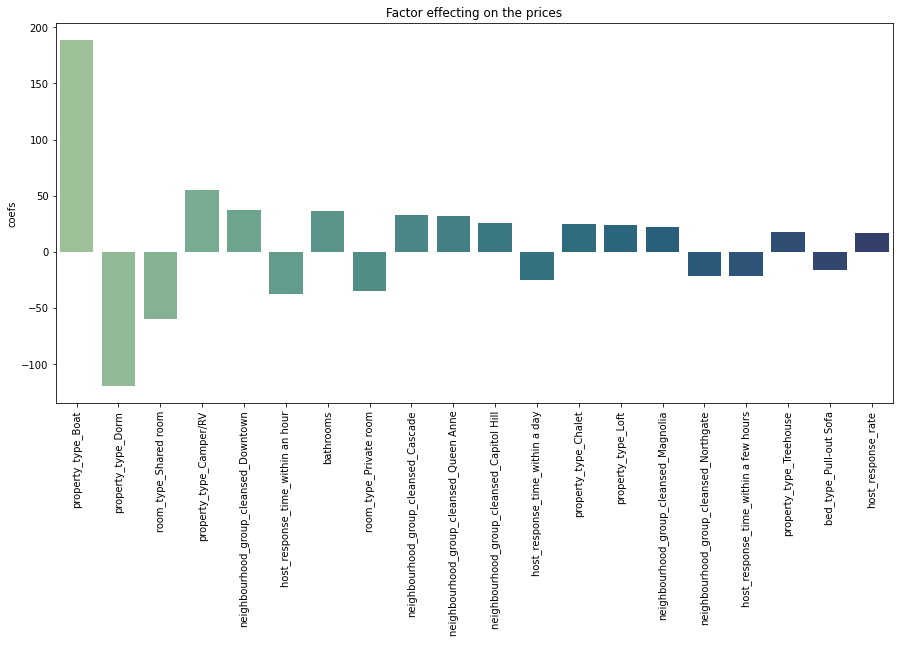

In [63]:
# Showing
plt.figure(figsize=(15, 7));
sns.barplot(x="est_int", y="coefs", data=coef_df[:20],palette = 'crest');
plt.xticks(rotation=90);
plt.title("Factor effecting on the prices");
plt.xlabel(" ");